# Titanic 프로젝트

< 데이터 설명 >    
- pclass : 1, 2, 3등석 정보를 각각 1, 2, 3으로 저장    
- survived : 생존 여부. survived(생존), dead(사망)    
- name : 이름    
- sex : 성별. female(여성), male(남성)    
- age : 나이    
- sibsp : 함께 탑승한 형제 또는 배우자의 수    
- parch : 함께 탑승한 부모 또는 자녀의 수    
- ticket : 티켓 번호    
- fare : 티켓 요금     
- cabin : 선실 번호      
- embarked : 탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)    

In [19]:
to_make_each_day_count <- read.csv('../Data/train.csv')
head(to_make_each_day_count)





PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


# 시각화를 통한 현황분석

현황분석을 통하여 Titanic 데이터에 대해서 이해 해보자.

먼저 탑승객들의 사망과 생존률을 시각화 하여 확인하기.

In [20]:
liveandead <- data.frame(사망 = sum(to_make_each_day_count[,2] == 0), 생존 = sum(to_make_each_day_count[,2] == 1))





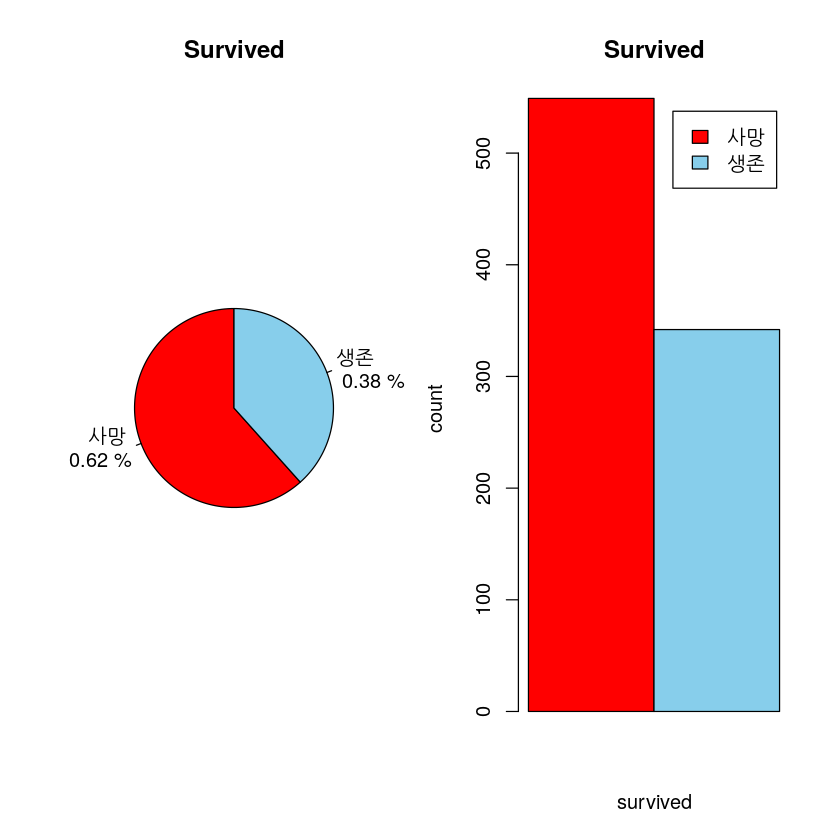

In [21]:
# 라이브러리 호출
library(plotrix)
# 시각화 틀 지정
par(mfrow = c(1,2)) 

# 생존과 사망의 비율 구하기 (사망자,생존자 / 전체 수)
live <- round(as.numeric(liveandead[1] / sum(liveandead)),2)
dead <- round(as.numeric(liveandead[2] / sum(liveandead)),2)

# 사망 생존 라벨 생성
lorde <- c('사망','생존')
ratio <- c(live,dead) # 몇퍼센트인지 숫자 보여주기위해 만들었음
label <- paste(lorde,'\n',ratio,'%')


# 시각화1
pie(as.matrix(liveandead), 
   init.angle=90, # 시작각도를 90에서 시작
   col = c("red","sky blue"),
    main = "Survived",
    labels = label
   )

text(4,40, "This is a 샘플",srt = 50)

# 시각화2
barplot(t(as.matrix(liveandead)),
       legend.text = T,
        col = c("red","sky blue"),
        main = "Survived",
        beside = T,
        xlab = "survived",
        ylab = "count"
       )

















탑승객의 60% 이상은 사망했다.    
Q 그렇다면 남녀별 생존비율은 어떨까?

--------------------
# 남녀의 생존비율 확인

In [22]:
# 여성과 남성의 전체 인원
femalecount <- sum(to_make_each_day_count[,5] == "female")
malecount <- sum(to_make_each_day_count[,5] == "male")
paste("Female Counts : ",femalecount)
paste("male Counts : ",malecount)





[1] "Female Counts :  314"

[1] "male Counts :  577"

In [23]:
# 남성의 생존과 사망인원
maleSurvival <- sum(to_make_each_day_count[,5]== "male" & to_make_each_day_count[,2] == 1)
maleDeath <- sum(to_make_each_day_count[,5]== "male" & to_make_each_day_count[,2] == 0)

paste("maleSurvival : ",maleSurvival)
paste("maleDeath : ",maleDeath)









[1] "maleSurvival :  109"

[1] "maleDeath :  468"

In [24]:
# 여성의 생존과 사망인원
femaleSurvival <- sum(to_make_each_day_count[,5]=="female" &to_make_each_day_count[,2] == 1)
femaleDeath <- sum(to_make_each_day_count[,5]=="female" &to_make_each_day_count[,2] == 0)

paste("femaleSurvival : ",femaleSurvival)
paste("femaleDeath : ",femaleDeath)









[1] "femaleSurvival :  233"

[1] "femaleDeath :  81"

In [25]:
# 여성의 생존율과 사망율
paste("Female Survival Ratio : ",femaleSurvival / femalecount * 100)
paste("Female Death Ratio : ",femaleDeath / femalecount * 100)





[1] "Female Survival Ratio :  74.2038216560509"

[1] "Female Death Ratio :  25.796178343949"

In [26]:
# 남성의 생존율과 사망율
paste("male Survival Ratio : ",maleSurvival / malecount * 100)
paste("male Death Ratio : ",maleDeath / malecount * 100)





[1] "male Survival Ratio :  18.8908145580589"

[1] "male Death Ratio :  81.1091854419411"

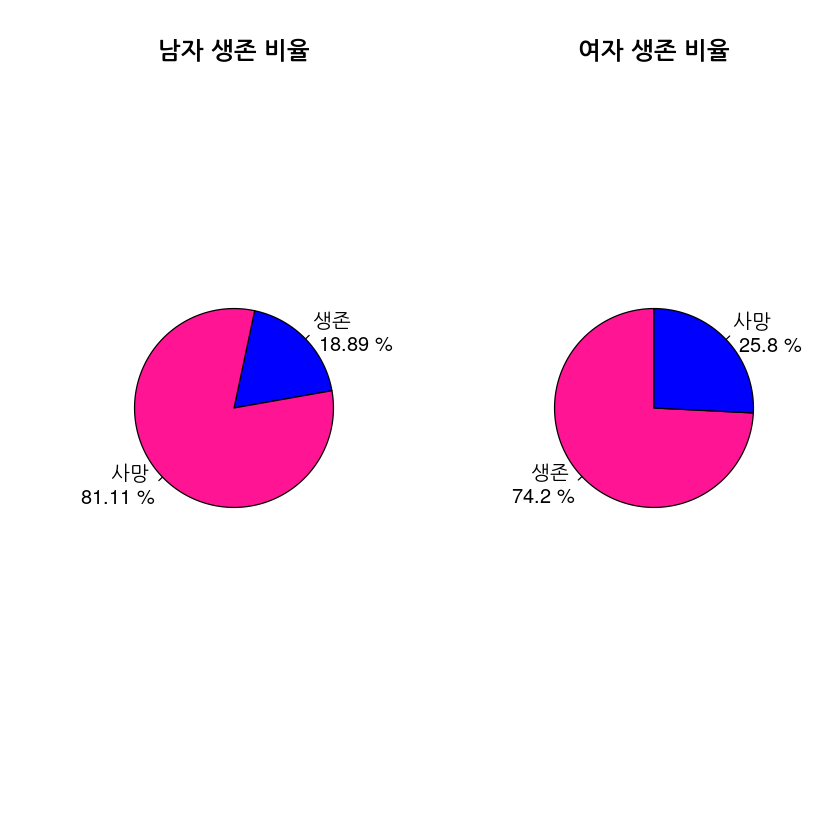

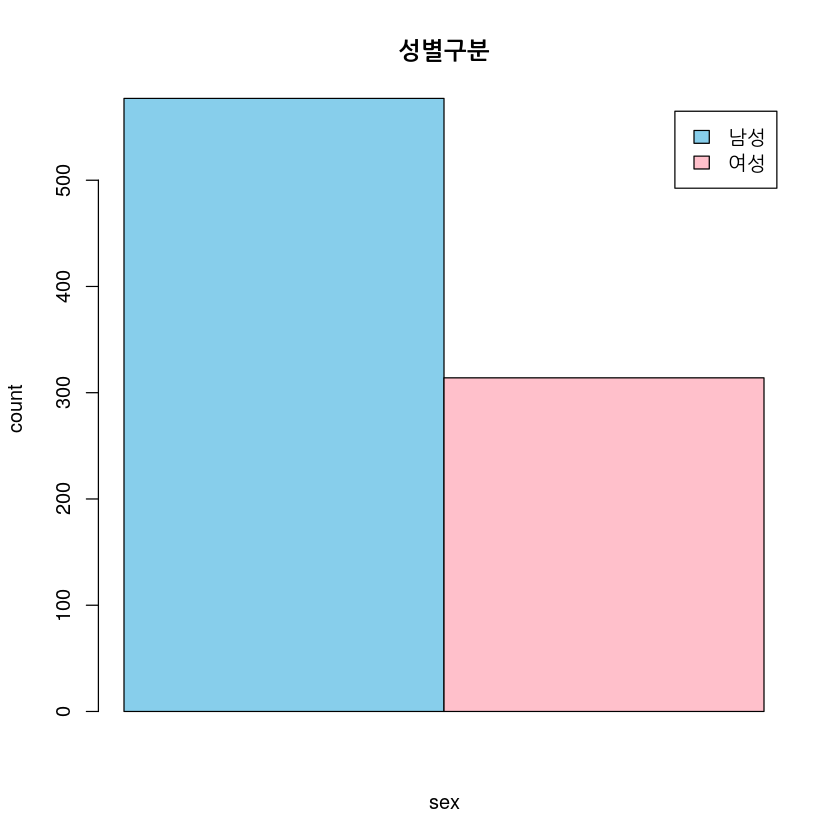

In [27]:
# 라이브러리 호출
library(plotrix)
# 시각화 틀 생성
par(mfrow = c(1,2)) 

# 파이차트에 사용할 라벨 생성
live <- round(maleSurvival / malecount * 100,2)
dead <- round(maleDeath / malecount * 100,2)
lorde <- c('생존','사망')
ratio <- c(live,dead) # 몇퍼센트인지 숫자 보여주기위해 만들었음
mlabel <- paste(lorde,'\n',ratio,'%')

live <- round(femaleSurvival / femalecount * 100,2)
dead <- round(femaleDeath / femalecount * 100,2)
lorde <- c('생존','사망')
ratio <- c(live,dead) # 몇퍼센트인지 숫자 보여주기위해 만들었음
flabel <- paste(lorde,'\n',ratio,'%')


# 시각화1
pie(c(maleSurvival / malecount * 100, 
      maleDeath / malecount * 100), 
   init.angle=10, # 시작각도를 90에서 시작
    main = "남자 생존 비율",
    labels = mlabel,
     col = c("blue","deeppink"),
   )

# 시각화2
pie(c(femaleSurvival / femalecount * 100,
      femaleDeath / femalecount * 100),
    init.angle=90, # 시작각도를 90에서 시작
   col = c("deeppink","blue"),
    main = "여자 생존 비율",
    labels = flabel
   )

# 시각화 틀 생성
par(mfrow = c(1,1)) 
barplot(t(as.matrix(data.frame(남성 = sum(to_make_each_day_count[,5] == "male"), 여성 = sum(to_make_each_day_count[,5] == "female")))),
       legend.text = T,
        col = c("sky blue","pink"),
        main = "성별구분",
        beside = T,
        xlab = "sex",
        ylab = "count",
       )





















In [65]:
# 객실 등급별 남녀 생존수 ??? R 에서 cross table 사용하기


table(paste(to_make_each_day_count$Sex,to_make_each_day_count$Survived), to_make_each_day_count$Pclass)

tableis <- table(paste(to_make_each_day_count$Sex,to_make_each_day_count$Survived), to_make_each_day_count$Pclass)
apply1 <- apply(table(paste(to_make_each_day_count$Sex,to_make_each_day_count$Survived), to_make_each_day_count$Pclass),1,sum)
apply2 <- c(apply(table(paste(to_make_each_day_count$Sex,to_make_each_day_count$Survived), to_make_each_day_count$Pclass),2,sum), sum(apply1))

sum(apply1)

rbind(cbind(tableis, apply1),apply2)









          
             1   2   3
  female 0   3   6  72
  female 1  91  70  72
  male 0    77  91 300
  male 1    45  17  47

[1] 891

,1,2,3,apply1
female 0,3,6,72,81
female 1,91,70,72,233
male 0,77,91,300,468
male 1,45,17,47,109
apply2,216,184,491,891


In [ ]:
to_make_each_day_count$Survived, to_make_each_day_count$Pclass





# 항구위치와 생존과의 연관성

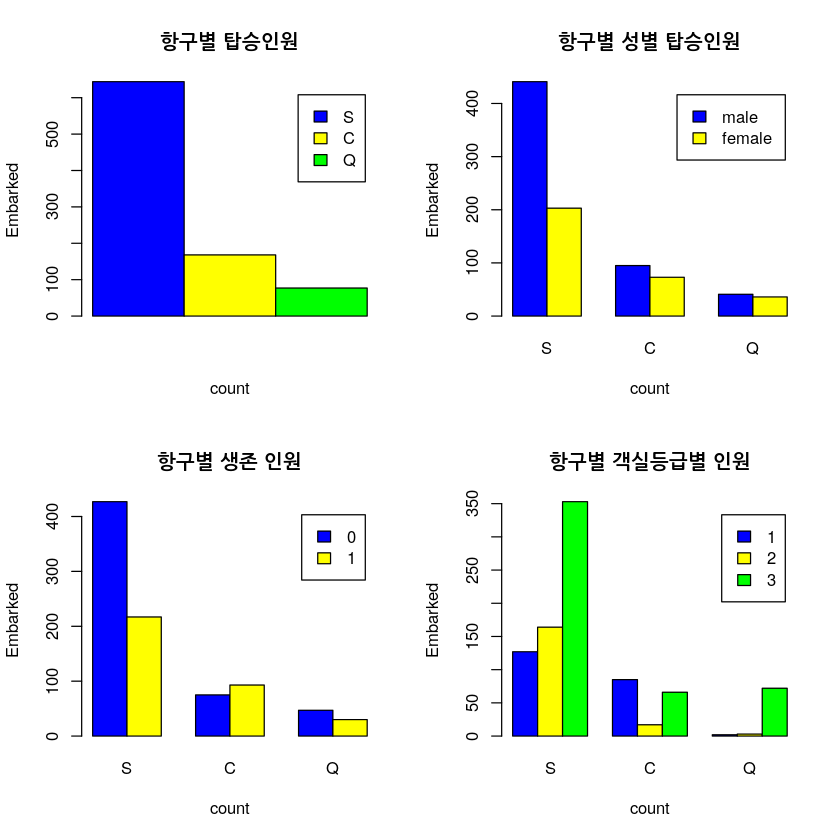

In [26]:
# Embarked(항국의 위치)와의 연관성 확인
par(mfrow = c(2,2)) 
hangu <- data.frame(S = sum(to_make_each_day_count[,12] == "S"), 
                         C = sum(to_make_each_day_count[,12] == "C"),
                         Q = sum(to_make_each_day_count[,12] == "Q"))

# 항구별 탑승인원
barplot(t(as.matrix(hangu)),
       legend.text = T,
        col = c("blue","yellow","green"),
        main = "항구별 탑승인원",
        beside = T,
        xlab = "count",
        ylab = "Embarked"
       )
#-------------------------------------------------------------------

#항구별 성별 탑승인원
liveandead <- data.frame(S = sum(to_make_each_day_count[,12] == "S"&to_make_each_day_count[,5] == "male"), 
                         C = sum(to_make_each_day_count[,12] == "C"&to_make_each_day_count[,5] == "male"),
                         Q = sum(to_make_each_day_count[,12] == "Q"&to_make_each_day_count[,5] == "male"))

liveandead2 <- data.frame(S = sum(to_make_each_day_count[,12] == "S"&to_make_each_day_count[,5] == "female"), 
                         C = sum(to_make_each_day_count[,12] == "C"&to_make_each_day_count[,5] == "female"),
                         Q = sum(to_make_each_day_count[,12] == "Q"&to_make_each_day_count[,5] == "female"))
hangu_sex <- rbind(liveandead,liveandead2)

row.names(hangu_sex) <- c("male","female")

barplot(as.matrix(hangu_sex),
       legend.text = T,
        col = c("blue","yellow"),
        main = "항구별 성별 탑승인원",
        beside = T,
        xlab = "count",
        ylab = "Embarked"
       )

#-------------------------------------------------------------------

# 항구별 생존인원
liveandead <- data.frame(S = sum(to_make_each_day_count[,12] == "S"&to_make_each_day_count[,2] == 0), 
                         C = sum(to_make_each_day_count[,12] == "C"&to_make_each_day_count[,2] == 0),
                         Q = sum(to_make_each_day_count[,12] == "Q"&to_make_each_day_count[,2] == 0))

liveandead2 <- data.frame(S = sum(to_make_each_day_count[,12] == "S"&to_make_each_day_count[,2] == 1), 
                         C = sum(to_make_each_day_count[,12] == "C"&to_make_each_day_count[,2] == 1),
                         Q = sum(to_make_each_day_count[,12] == "Q"&to_make_each_day_count[,2] == 1))
hangu_live <- rbind(liveandead,liveandead2)

row.names(hangu_live) <- c("0","1")

barplot(as.matrix(hangu_live),
       legend.text = T,
        col = c("blue","yellow"),
        main = "항구별 생존 인원",
        beside = T,
        xlab = "count",
        ylab = "Embarked"
       )

#-------------------------------------------------------------------

# 항구별 객실등급
liveandead <- data.frame(S = sum(to_make_each_day_count[,12] == "S"&to_make_each_day_count[,3] == 1), 
                         C = sum(to_make_each_day_count[,12] == "C"&to_make_each_day_count[,3] == 1),
                         Q = sum(to_make_each_day_count[,12] == "Q"&to_make_each_day_count[,3] == 1))

liveandead2 <- data.frame(S = sum(to_make_each_day_count[,12] == "S"&to_make_each_day_count[,3] == 2), 
                         C = sum(to_make_each_day_count[,12] == "C"&to_make_each_day_count[,3] == 2),
                         Q = sum(to_make_each_day_count[,12] == "Q"&to_make_each_day_count[,3] == 2))

liveandead3 <- data.frame(S = sum(to_make_each_day_count[,12] == "S"&to_make_each_day_count[,3] == 3), 
                         C = sum(to_make_each_day_count[,12] == "C"&to_make_each_day_count[,3] == 3),
                         Q = sum(to_make_each_day_count[,12] == "Q"&to_make_each_day_count[,3] == 3))

hangu_live <- rbind(liveandead,liveandead2)
hangu_live <- rbind(hangu_live,liveandead3)

row.names(hangu_live) <- c("1","2","3")

barplot(as.matrix(hangu_live),
       legend.text = T,
        col = c("blue","yellow","green"),
        main = "항구별 객실등급별 인원",
        beside = T,
        xlab = "count",
        ylab = "Embarked"
       )

















절반 이상의 승객이 southampton에서 배를 탔으며   
여기에서 탑승한 승객의 70퍼센트가 남성이었으며   
남성의 사망율이 여성보다 훨씬 높았으므로 southampton의 사망률이 높게 나왔다.   
southampton에서 탑승한 승객의 60퍼센트 이상이 3등급 객실을 사용했다.   
cherbourg(짤츠부르크)에서 탑승한 승객들은 1등 객실 승객의 비중 및 생존율이 높은것으로 보아    
이 동네는 부자 동네이다.   

In [27]:
# 생존과 티켓 등급의 상관계수
cor(to_make_each_day[,2],to_make_each_day[,3])





ERROR: Error in is.data.frame(y): object 'to_make_each_day' not found


# 성별, 티켓등급, 탑승항구의 데이터를 이용한
# 타이타닉 데이터를 활용하여 생존자의 생존여부 예측

# 결과 도출을 위한 전처리(Preprocessing)
성별, 객실등급, 탑승항구의 3가지 정보로 생존률을 비교하는 로직을 구성   
대부분의 분석 시간중 전처리 과정이 80% 이상의 시간이 소요   
위의 데이터 분석결과를 보면 여성+1등급 = 생존 이라는 예측이 가능.    
위읭 성별, 객실등급, 탑승항구의 정보를 사용하여 예측을 할 경우    
각 항목의 데이터 값이 있어야 합니다.   
따라서 분석전에 각 항목의 데이터가 모두 채워졌는지를 확인하며   
데이터가 비어 있는 경우 이를 해결하는 과정이 전처리 과정입니다.   
예측을 위한 머신러닝을 사용할 경우 모든 데이터가 숫자로 변경되어 있어야 합니다.   

In [28]:
# 결측치 확인
# 각 칼럼의 결측치 합계를 출력
sum(to_make_each_day_count[,12]=="")





[1] 2

사용할 정보 중 Embarked 항목에 2개의 결측치가 있다는 것을 확인   
결측치를 사용할 경우에는 회귀분석이나 기본 통계량으로 처리하는 방법등 여러가지가 있지만    
Embarked중 S에서 탑승한 인원이 제일 많으므로 이 결측값을 S로 대체한다.

In [29]:
to_make_each_day_count[to_make_each_day_count[,12]=="",12] <- "S"





In [30]:
sum(to_make_each_day_count[,12]=="")





[1] 0

In [55]:
# factor 변경
to_make_each_day_count$Embarked <- factor(to_make_each_day_count$Embarked)
str(to_make_each_day_count)





'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...


In [32]:
# 예측 모델 생성


In [62]:
# 예측을 위한 컬럼확인
mlearn <- to_make_each_day_count[,c(1,3,5,12)]
head(mlearn)





PassengerId,Pclass,Sex,Embarked
1,3,male,S
2,1,female,C
3,3,female,S
4,1,female,S
5,3,male,S
6,3,male,Q


In [63]:
# 성별을 숫자로 전환
mlearn$Sex <- ifelse(mlearn$Sex == "male" , 0, 1)
head(mlearn)





PassengerId,Pclass,Sex,Embarked
1,3,0,S
2,1,1,C
3,3,1,S
4,1,1,S
5,3,0,S
6,3,0,Q


### Embarked를 숫자로 전환
C=0,S=1,Q=2 로 숫자를 지정하면 숫자 2가 애매해 진다. 0과 1은 대소분류가 가능하지만 2가 들어가면 애매

One-hot Encoding을 활용 - 더미테이블     
C = [1,0,0]     
S = [0,1,0]    
Q = [1,0,1]    

In [64]:
mlearn$Embarked_S <- ifelse(mlearn$Embarked == "S" , 1, 0)
mlearn$Embarked_C <- ifelse(mlearn$Embarked == "C" , 1, 0)
mlearn$Embarked_Q <- ifelse(mlearn$Embarked == "Q" , 1, 0)
head(mlearn)





PassengerId,Pclass,Sex,Embarked,Embarked_S,Embarked_C,Embarked_Q
1,3,0,S,1,0,0
2,1,1,C,0,1,0
3,3,1,S,1,0,0
4,1,1,S,1,0,0
5,3,0,S,1,0,0
6,3,0,Q,0,0,1


In [44]:
library("doBy")





In [65]:
# 테스트 데이터와 문제데이터로 바꾸기 위해서 칼럼 합쳐주기
mlearn <- cbind(to_make_each_day_count$Survived,mlearn)
head(mlearn)
colnames(mlearn)





to_make_each_day_count$Survived,PassengerId,Pclass,Sex,Embarked,Embarked_S,Embarked_C,Embarked_Q
0,1,3,0,S,1,0,0
1,2,1,1,C,0,1,0
1,3,3,1,S,1,0,0
1,4,1,1,S,1,0,0
0,5,3,0,S,1,0,0
0,6,3,0,Q,0,0,1


[1] "to_make_each_day_count$Survived" "PassengerId"                    
[3] "Pclass"                          "Sex"                            
[5] "Embarked"                        "Embarked_S"                     
[7] "Embarked_C"                      "Embarked_Q"

In [67]:
colnames(mlearn) <- c('Survived', 'PassengerId', 'Pclass', 'Sex', 'Embarked', 'Embarked_S', 'Embarked_C', 'Embarked_Q')
head(mlearn)
mlearn <- mlearn[-2]
head(mlearn)





Survived,PassengerId,Pclass,Sex,Embarked,Embarked_S,Embarked_C,Embarked_Q
0,1,3,0,S,1,0,0
1,2,1,1,C,0,1,0
1,3,3,1,S,1,0,0
1,4,1,1,S,1,0,0
0,5,3,0,S,1,0,0
0,6,3,0,Q,0,0,1


Survived,Pclass,Sex,Embarked,Embarked_S,Embarked_C,Embarked_Q
0,3,0,S,1,0,0
1,1,1,C,0,1,0
1,3,1,S,1,0,0
1,1,1,S,1,0,0
0,3,0,S,1,0,0
0,3,0,Q,0,0,1


In [69]:
mlearn <- orderBy(~ Survived, mlearn)
mlearn<-mlearn[-4] # Embarked 지우기
head(mlearn)






,Survived,Pclass,Sex,Embarked_S,Embarked_C,Embarked_Q
1,0,3,0,1,0,0
5,0,3,0,1,0,0
6,0,3,0,0,0,1
7,0,1,0,1,0,0
8,0,3,0,1,0,0
13,0,3,0,1,0,0


### 샘플링 살피기

In [123]:
# 생존과 죽음의 데이터 갯수 보기
sum(mlearn[,1]==0) / (sum(mlearn[,1]==0) +  sum(mlearn[,1]==1))   # 사망자 비율
sum(mlearn[,1]==1) / (sum(mlearn[,1]==0) +  sum(mlearn[,1]==1))   # 생존자

# 사망자 칼럼 위치
sum(mlearn[,1]==0)

# 생존자 시작점
mlearn[550,1]

#합계
sum(mlearn[,1]==0) + sum(mlearn[,1]==1)





[1] 0.6161616

[1] 0.3838384

[1] 549

[1] 1

[1] 891

# Random Forest 에서 예측값 변경해주는 소스 잘 보기

In [70]:
library(randomForest)
# 샘플 데이터 형성
#  150 : 105 (70%) + 45 (30%)
set.seed(1234) # 샘플값 고정
samp <- c(sample(1:549, 385), sample(550:891,240))

# 학습용 검증용 데이터 분류
# 학습용 데이터
data.tr <- mlearn[samp,]
# 검증용 데이터
data.test <- mlearn[-samp,]

# 학습시키기
rf <- randomForest( Survived ~., data = data.tr, ntree = 100)

# 예측하기
pred <- predict(rf, data.test)
pred[pred <= 0.5] <- 0
pred[pred > 0.5] <- 1

# 확인하기 - 정답 오답을
table(data.test$Survived, pred)

# 예측률
round(mean(data.test$Survived == pred) * 100,2)

















randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”

   pred
      0   1
  0 153  11
  1  45  57

[1] 78.95

## ★샘플링 할때 데이터를 잘 살펴보아야 한다.

## 주요 요인별로 샘플링 갯수를 맞춰서 다시 살펴보자

In [76]:
smapling <- orderBy(~ Survived+Pclass, mlearn)





In [88]:
sum(smapling[,1]==0&smapling[,2]==1) # 1 - 80
sum(smapling[,1]==0&smapling[,2]==2) # 81 - 177
sum(smapling[,1]==0&smapling[,2]==3) # 177 - 549
sum(smapling[,1]==1&smapling[,2]==1) # 549 - 685
sum(smapling[,1]==1&smapling[,2]==2) # 685 - 772
sum(smapling[,1]==1&smapling[,2]==3) # 772 - 891
print("------------------")
(80 - 0) * 0.7
(177 - 80) * 0.7
(549 - 177) * 0.7
(685 - 549) * 0.7
(772 - 685) * 0.7
(891 - 772) * 0.7









[1] 80

[1] 97

[1] 372

[1] 136

[1] 87

[1] 119

[1] "------------------"


[1] 56

[1] 67.9

[1] 260.4

[1] 95.2

[1] 60.9

[1] 83.3

In [89]:
library(randomForest)
# 샘플 데이터 형성
#  150 : 105 (70%) + 45 (30%)
set.seed(1234) # 샘플값 고정
samp <- c(sample(1:80, 56), sample(81:177,67), sample(178:549,260), sample(550:685,95), sample(686:772,60), sample(773:891,83))

# 학습용 검증용 데이터 분류
# 학습용 데이터
data.tr <- mlearn[samp,]
# 검증용 데이터
data.test <- mlearn[-samp,]

# 학습시키기
rf <- randomForest( Survived ~., data = data.tr, ntree = 100)

# 예측하기
pred <- predict(rf, data.test)
pred[pred <= 0.5] <- 0
pred[pred > 0.5] <- 1

# 확인하기 - 정답 오답을
table(data.test$Survived, pred)

# 예측률
round(mean(data.test$Survived == pred) * 100,2)

















Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”

   pred
      0   1
  0 145  21
  1  42  62

[1] 76.67

In [104]:
# 죽은 사람먼저 rbind 하기 
a<-mlearn[mlearn$Survived==0&mlearn$Sex==0&mlearn$Pclass==1&mlearn$Embarked_S==1,]
b<-mlearn[mlearn$Survived==0&mlearn$Sex==1&mlearn$Pclass==1&mlearn$Embarked_S==1,]
c<-mlearn[mlearn$Survived==0&mlearn$Sex==0&mlearn$Pclass==2&mlearn$Embarked_S==1,]
d<-mlearn[mlearn$Survived==0&mlearn$Sex==1&mlearn$Pclass==2&mlearn$Embarked_S==1,]
e<-mlearn[mlearn$Survived==0&mlearn$Sex==0&mlearn$Pclass==3&mlearn$Embarked_S==1,]
f<-mlearn[mlearn$Survived==0&mlearn$Sex==1&mlearn$Pclass==3&mlearn$Embarked_S==1,]
g<-mlearn[mlearn$Survived==0&mlearn$Sex==0&mlearn$Pclass==1&mlearn$Embarked_C==1,]
h<-mlearn[mlearn$Survived==0&mlearn$Sex==1&mlearn$Pclass==1&mlearn$Embarked_C==1,]
i<-mlearn[mlearn$Survived==0&mlearn$Sex==0&mlearn$Pclass==2&mlearn$Embarked_C==1,]
j<-mlearn[mlearn$Survived==0&mlearn$Sex==1&mlearn$Pclass==2&mlearn$Embarked_C==1,]
k<-mlearn[mlearn$Survived==0&mlearn$Sex==0&mlearn$Pclass==3&mlearn$Embarked_C==1,]
l<-mlearn[mlearn$Survived==0&mlearn$Sex==1&mlearn$Pclass==3&mlearn$Embarked_C==1,]
m<-mlearn[mlearn$Survived==0&mlearn$Sex==0&mlearn$Pclass==1&mlearn$Embarked_Q==1,]
n<-mlearn[mlearn$Survived==0&mlearn$Sex==1&mlearn$Pclass==1&mlearn$Embarked_Q==1,]
o<-mlearn[mlearn$Survived==0&mlearn$Sex==0&mlearn$Pclass==2&mlearn$Embarked_Q==1,]
p<-mlearn[mlearn$Survived==0&mlearn$Sex==1&mlearn$Pclass==2&mlearn$Embarked_Q==1,]
q<-mlearn[mlearn$Survived==0&mlearn$Sex==0&mlearn$Pclass==3&mlearn$Embarked_Q==1,]
r<-mlearn[mlearn$Survived==0&mlearn$Sex==1&mlearn$Pclass==3&mlearn$Embarked_Q==1,]
mlearn_death<- rbind(a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r)













In [105]:
# 산 사람 rbind 하기 
a<-mlearn[mlearn$Survived==1&mlearn$Sex==0&mlearn$Pclass==1&mlearn$Embarked_S==1,]
b<-mlearn[mlearn$Survived==1&mlearn$Sex==1&mlearn$Pclass==1&mlearn$Embarked_S==1,]
c<-mlearn[mlearn$Survived==1&mlearn$Sex==0&mlearn$Pclass==2&mlearn$Embarked_S==1,]
d<-mlearn[mlearn$Survived==1&mlearn$Sex==1&mlearn$Pclass==2&mlearn$Embarked_S==1,]
e<-mlearn[mlearn$Survived==1&mlearn$Sex==0&mlearn$Pclass==3&mlearn$Embarked_S==1,]
f<-mlearn[mlearn$Survived==1&mlearn$Sex==1&mlearn$Pclass==3&mlearn$Embarked_S==1,]
g<-mlearn[mlearn$Survived==1&mlearn$Sex==0&mlearn$Pclass==1&mlearn$Embarked_C==1,]
h<-mlearn[mlearn$Survived==1&mlearn$Sex==1&mlearn$Pclass==1&mlearn$Embarked_C==1,]
i<-mlearn[mlearn$Survived==1&mlearn$Sex==0&mlearn$Pclass==2&mlearn$Embarked_C==1,]
j<-mlearn[mlearn$Survived==1&mlearn$Sex==1&mlearn$Pclass==2&mlearn$Embarked_C==1,]
k<-mlearn[mlearn$Survived==1&mlearn$Sex==0&mlearn$Pclass==3&mlearn$Embarked_C==1,]
l<-mlearn[mlearn$Survived==1&mlearn$Sex==1&mlearn$Pclass==3&mlearn$Embarked_C==1,]
m<-mlearn[mlearn$Survived==1&mlearn$Sex==0&mlearn$Pclass==1&mlearn$Embarked_Q==1,]
n<-mlearn[mlearn$Survived==1&mlearn$Sex==1&mlearn$Pclass==1&mlearn$Embarked_Q==1,]
o<-mlearn[mlearn$Survived==1&mlearn$Sex==0&mlearn$Pclass==2&mlearn$Embarked_Q==1,]
p<-mlearn[mlearn$Survived==1&mlearn$Sex==1&mlearn$Pclass==2&mlearn$Embarked_Q==1,]
q<-mlearn[mlearn$Survived==1&mlearn$Sex==0&mlearn$Pclass==3&mlearn$Embarked_Q==1,]
r<-mlearn[mlearn$Survived==1&mlearn$Sex==1&mlearn$Pclass==3&mlearn$Embarked_Q==1,]
mlearn_sur<- rbind(a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r)













In [102]:
# 죽은사람 + 산사람으로 전체 테이블 만들기
train_mc<- rbind(mlearn_death,mlearn_sur)





In [106]:
set.seed(1234) # 데이터가 안변하고 쓸수 있다. 숫자 아무거나 쓰면된당
samp <-c(sample(1:51,15),sample(54:135,25),sample(142:372,69),sample(373:427,16),sample(428:452,16),sample(428:452,16),sample(462:494,9),
         sample(505:540,10),sample(550:577,8),sample(578:625,14),sample(626:640,4),sample(641:701,18),sample(702:735,10),sample(736:768,10),
       sample(769:785,5),sample(786:827,12),sample(837:846,3),sample(849:852,4),sample(868:891,6) )

data.tr <- mlearn[-samp,]
data.test <- mlearn[samp,]
rf <- randomForest(Survived ~ ., data =data.tr , ntree =100)
pred <- predict(rf,data.test)
pred[pred <=0.5]<-0
pred[pred >0.5]<-1

table(data.test$Survived,pred)
paste('예측 확률', round(mean((data.test$Survived==pred)),4)*100,'%')









Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”

   pred
      0   1
  0 167   9
  1  39  55

[1] "예측 확률 82.22 %"

# SVM 으로 진행

In [92]:
library(e1071)
# 샘플 데이터 형성
#  150 : 105 (70%) + 45 (30%)
set.seed(1234) # 샘플값 고정
samp <- c(sample(1:80, 56), sample(81:177,67), sample(178:549,260), sample(550:685,95), sample(686:772,60), sample(773:891,83))

# 학습용 검증용 데이터 분류
# 학습용 데이터
data.train <- mlearn[samp,]
# 검증용 데이터
data.test <- mlearn[-samp,]

# 학습시키기
model <- svm(Survived ~., data = data.train)

# 예측하기
pred <- predict(model, data.test)
pred[pred <= 0.5] <- 0
pred[pred > 0.5] <- 1

# 확인하기 - 정답 오답을
table(data.test$Survived, pred)


# 예측률
round(mean(data.test$Survived == pred) * 100,2)

















   pred
      0   1
  0 156  10
  1  45  59

[1] 79.63

# 특정값 사용하여 예측하기